In [ ]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

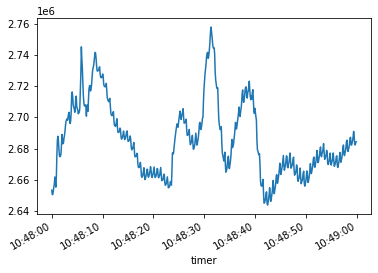

In [ ]:
# load the dataset

from matplotlib import pyplot
series = pandas.read_csv('raw_ppg.csv', header=0, index_col=1, parse_dates=True, squeeze=True)
series.plot()
pyplot.show()

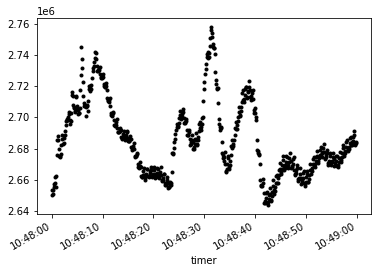

In [ ]:
series.plot(style='k.')
pyplot.show()

In [ ]:
dataframe = pandas.read_csv('raw_ppg.csv', usecols=[0], engine='python')
dataset = dataframe.values

In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

479 120


In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=10):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t and Y=t+1
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=10, verbose=2)

Epoch 1/100
47/47 - 3s - loss: 0.1149 - 3s/epoch - 54ms/step
Epoch 2/100
47/47 - 0s - loss: 0.0284 - 103ms/epoch - 2ms/step
Epoch 3/100
47/47 - 0s - loss: 0.0083 - 112ms/epoch - 2ms/step
Epoch 4/100
47/47 - 0s - loss: 0.0069 - 104ms/epoch - 2ms/step
Epoch 5/100
47/47 - 0s - loss: 0.0064 - 110ms/epoch - 2ms/step
Epoch 6/100
47/47 - 0s - loss: 0.0060 - 115ms/epoch - 2ms/step
Epoch 7/100
47/47 - 0s - loss: 0.0057 - 115ms/epoch - 2ms/step
Epoch 8/100
47/47 - 0s - loss: 0.0054 - 115ms/epoch - 2ms/step
Epoch 9/100
47/47 - 0s - loss: 0.0052 - 107ms/epoch - 2ms/step
Epoch 10/100
47/47 - 0s - loss: 0.0050 - 113ms/epoch - 2ms/step
Epoch 11/100
47/47 - 0s - loss: 0.0048 - 109ms/epoch - 2ms/step
Epoch 12/100
47/47 - 0s - loss: 0.0046 - 104ms/epoch - 2ms/step
Epoch 13/100
47/47 - 0s - loss: 0.0045 - 102ms/epoch - 2ms/step
Epoch 14/100
47/47 - 0s - loss: 0.0043 - 99ms/epoch - 2ms/step
Epoch 15/100
47/47 - 0s - loss: 0.0042 - 103ms/epoch - 2ms/step
Epoch 16/100
47/47 - 0s - loss: 0.0040 - 98ms/epoch 

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

4/4 [==============================] - 0s 3ms/step
Train Score: 4382.29 RMSE
Test Score: 2917.34 RMSE


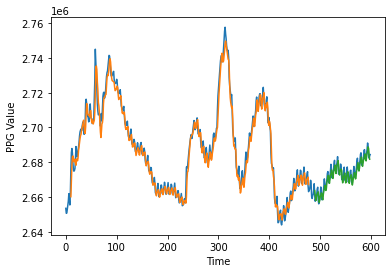

In [ ]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.xlabel("Time")
plt.ylabel("PPG Value")
plt.show()
